# Smoothing VIIRS

In [9]:

# imports
import seaborn as sns
from matplotlib import pyplot as plt
import xarray
import h5py 
import skimage

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

# Load VIIRS table

In [2]:
viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet


# Load up a VIIRS cutout

In [5]:
idx = np.argmin(np.abs(viirs_tbl.LL + 400.))
cutout = viirs_tbl.iloc[idx]
cutout

filename            s3://viirs/data/2013/317/20131113023000-OSPO-L...
row                                                              1104
col                                                               960
lat                                                         19.923225
lon                                                        -17.835772
clear_fraction                                               0.011068
field_size                                                        192
datetime                                          2013-11-13 02:30:00
ex_filename         s3://viirs/Extractions/VIIRS_2013_95clear_192x...
pp_file             s3://viirs/PreProc/VIIRS_2013_95clear_192x192_...
pp_root                                                     viirs_std
pp_idx                                                         485088
pp_type                                                             0
mean_temperature                                            23.386496
Tmin                

## Grab it

In [6]:
img = image_utils.grab_image(cutout)

## Show

<AxesSubplot:>

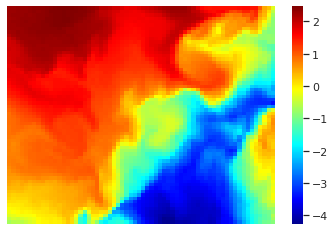

In [8]:
plotting.show_image(img)

# Smooth me

In [12]:
smoothed = skimage.filters.gaussian(img, 3.)

<AxesSubplot:>

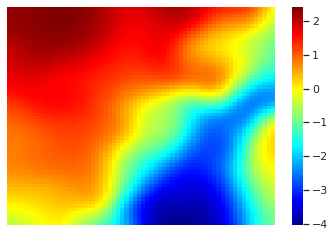

In [13]:
plotting.show_image(smoothed)

----